# File to learn how to train nn models using pytorch

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#### Data Preparing and Loading

Data can really be anyting
* Matrices
* Images
* Text 

The **first step** that we wanna do is convert the data into numerical format.

In [5]:
# A simple example to start with can be Linear Regression

# Making some data
Weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim = 1)

y = Weight*X + bias


#### Splitting the data into training and testing datasets

In [6]:
# Create a train test split

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

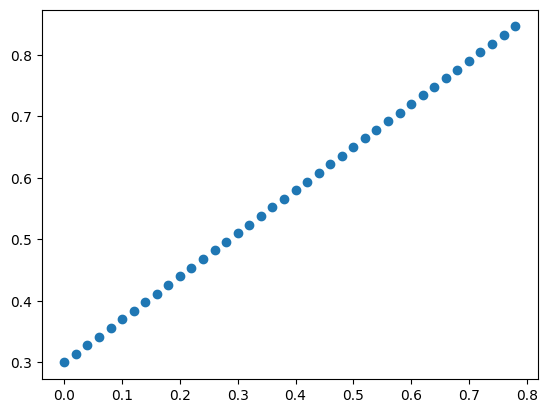

In [7]:
plt.plot(X_train, y_train, 'o')

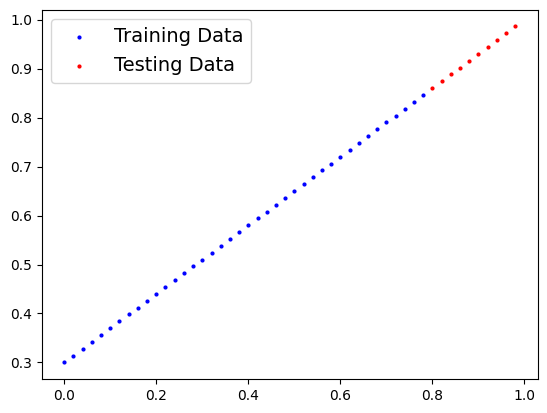

In [23]:
# Function  to plot all our ponts

def plot_predictions(x_train = X_train, 
                     y_train = y_train, 
                     x_test = X_test, 
                     y_test = y_test, 
                     predictions = None):
    plt.scatter(x_train, y_train , c = "b", s = 4, label = "Training Data")
    plt.scatter(x_test, y_test , c = "r", s = 4, label = "Testing Data")
    if predictions is not None:
        plt.scatter(x_test, predictions , c = "g", s = 4, label = "Prediction")
        
    plt.legend(prop = {"size":14})
        
plot_predictions()

#### Building the predictor model


In [19]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype = torch.float32))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype=torch.float32))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

In [48]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#### Making predictions using the model

In [49]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

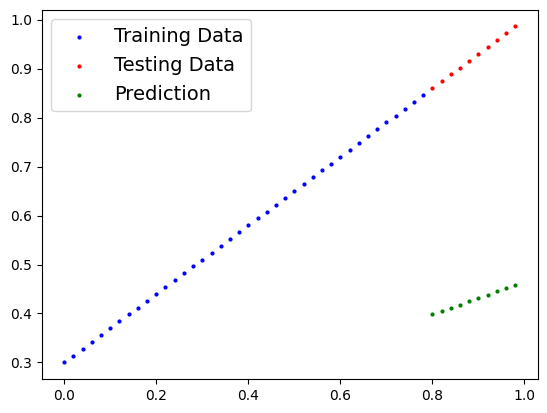

In [50]:
plot_predictions(predictions=y_preds)

#### Setup of a Loss Funciton and an Optimiser

In [52]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup of the optimiser
optimiser = torch.optim.SGD(
    params=model_0.parameters(),
    lr= 0.01 # learning Rate
)

#### Building a training loop in pytorch

In [53]:
# An epoch is one loop through the data 
epochs = 100

for epoch in range(epochs):
    model_0.train() # train mode in Pytorch required grad = true
    
    # 1. forward pass
    y_preds = model_0(X_train)
    
    # 2. Calculating loss
    loss = loss_fn(y_preds,y_train)
    
    # 3. optimize the zero grad
    optimiser.zero_grad()
    
    # 4. perform backprop on the loss wrt parameters of the model
    loss.backward()
    
    # 5.  Step the optimiser (perform gradient descent)
    optimiser.step() # by default accumulates 
    
    ### Testing
    model_0.eval() # turns off grad tracking the change through the loop
    with torch.inference_mode():
        # 1.do the forward pass
        test_pred = model_0(X_test)
        # calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    # Print What is happeningn
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss} ")
    

Epoch: 0 | Loss: 0.31288138031959534 | test_loss: 0.48106518387794495 
Epoch: 10 | Loss: 0.1976713240146637 | test_loss: 0.3463551998138428 
Epoch: 20 | Loss: 0.08908725529909134 | test_loss: 0.21729660034179688 
Epoch: 30 | Loss: 0.053148526698350906 | test_loss: 0.14464017748832703 
Epoch: 40 | Loss: 0.04543796554207802 | test_loss: 0.11360953003168106 
Epoch: 50 | Loss: 0.04167863354086876 | test_loss: 0.09919948130846024 
Epoch: 60 | Loss: 0.03818932920694351 | test_loss: 0.08886633068323135 
Epoch: 70 | Loss: 0.03476089984178543 | test_loss: 0.0805937647819519 
Epoch: 80 | Loss: 0.03132382780313492 | test_loss: 0.07232122868299484 
Epoch: 90 | Loss: 0.02788739837706089 | test_loss: 0.06473556160926819 


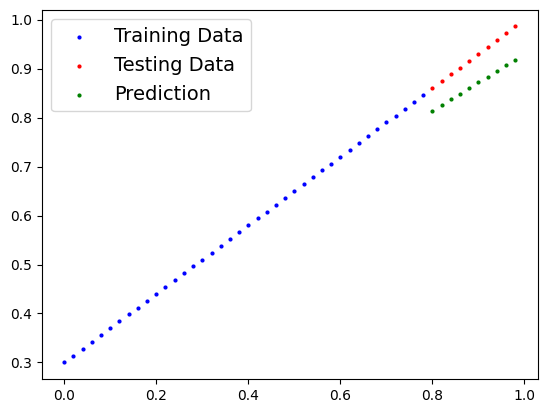

In [56]:
with torch.inference_mode():
    test_pred = model_0(X_test)
plot_predictions(predictions=test_pred)